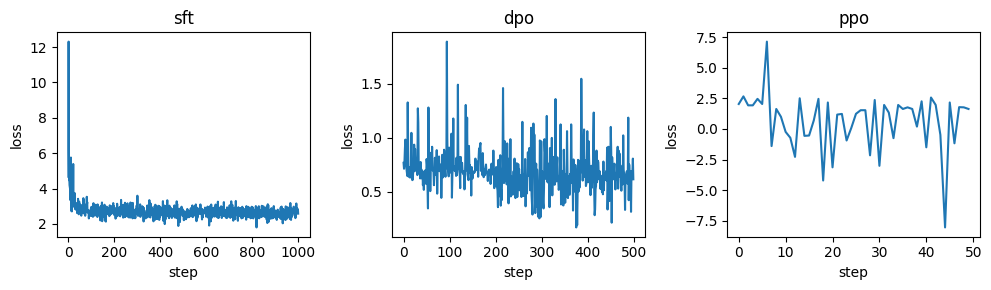

In [1]:

model_name="google/gemma-3-4b-it"
sft_lora_path=f"checkpoints/{model_name}-sft-lora"
dpo_lora_path=f"checkpoints/{model_name}-dpo-lora"
ppo_lora_path=f"checkpoints/{model_name}-ppo-lora"

import json
import seaborn as sns
import matplotlib.pyplot as plt

sft_history = json.load(open(f"{sft_lora_path}/loss_history.json"))
dpo_history = json.load(open(f"{dpo_lora_path}/loss_history.json"))
ppo_history = json.load(open(f"{ppo_lora_path}/loss_history.json"))

dfs = {
    'step':[],
    'loss':[],
    'type':[]
}

history_pairs = [
    (sft_history, 'sft'),
    (dpo_history, 'dpo'),
    (ppo_history, 'ppo')
]
settings = [v[1] for v in history_pairs]

for history, t in history_pairs:
    count = 0 
    for h in history:
        dfs['step'].append(count)
        dfs['type'].append(t)
        count += 1
        if 'loss' in h:
            dfs['loss'].append(h['loss'])
        elif 'total_loss' in h:
            dfs['loss'].append(h['total_loss'])

import pandas as pd
dfs = pd.DataFrame(dfs)

fig, axes = plt.subplots(1, len(settings), figsize=(10, 3))
for i, t in enumerate(settings):
    sns.lineplot(x="step", y="loss", data=dfs[dfs['type'] == t], ax=axes[i])
    axes[i].set_title(t)
plt.tight_layout()

In [2]:
from src_utils import load_shp_dataset, generate_response
from src_lora import load_lora_model

# Load sample
dataset = load_shp_dataset(max_samples=10)
# Load models
sft_model, tokenizer = load_lora_model(
    model_name, sft_lora_path
)
dpo_model, _ = load_lora_model(
    model_name, dpo_lora_path
)

ppo_model, _ = load_lora_model(
    model_name, ppo_lora_path
)

def generate_response_compare(sample_index):
    sample = dataset[sample_index]
    prompt = sample["prompt"]
    chosen = sample["chosen"]
    rejected = sample["rejected"]

    # Generate
    sft_output = generate_response(
        sft_model, tokenizer, prompt
    )
    dpo_output = generate_response(
        dpo_model, tokenizer, prompt
    )
    ppo_output = generate_response(
        ppo_model, tokenizer, prompt
    )

    # Print results
    print("\n" + "=" * 80)
    print("🧠 PROMPT")
    print(prompt)

    print("\n✅ DATASET (CHOSEN)")
    print(chosen)

    print("\n❌ DATASET (REJECTED)")
    print(rejected)

    print("\n🔵 SFT GENERATION")
    print(sft_output)

    print("\n🟢 DPO GENERATION")
    print(dpo_output)

    print("\n🔴 PPO GENERATION")
    print(ppo_output)

    print("=" * 80)


/home/bumjin/anaconda3/lib/python3.11/site-packages/transformers/utils/hub.py:110: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
2026-01-16 10:13:02.008538: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-16 10:13:02.025050: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2026-01-16 10:13:02.043442: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2026-01-16 10:13:02.048820: E external/local_xla/xla/stream_exe

Resolving data files:   0%|          | 0/18 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/18 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/18 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

trainable params: 3,223,552 || all params: 4,303,303,024 || trainable%: 0.0749


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

trainable params: 3,223,552 || all params: 4,303,303,024 || trainable%: 0.0749


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

trainable params: 3,223,552 || all params: 4,303,303,024 || trainable%: 0.0749


In [4]:
sample_index=0
generate_response_compare(sample_index)


🧠 PROMPT
[Harry Potter] If Harry uses the invisibility cloak backwards.. What does he see? Let's assume the invisibility cloak works only on one side. If Harry puts the inner side out, what does he see?

✅ DATASET (CHOSEN)
Magic primarily works through intent, rather than through hard mechanics. Drop your wand on the floor and it isn't going to shoot out spells. Someone needs to be casting them. Throw a flying broom as hard and as far as you can, and it isn't going to fly. Someone needs to be riding it.  The invisibility cloak is, for all intents and purposes, just a cloak until someone decides to wear it. I don't think it'd actually become invisible or *do* anything unless you were wearing it properly.

❌ DATASET (REJECTED)
If the cloak were reversible it would be almost impossible to guarantee to be able to put it on right.  After all, it's barely visible anyway.

🔵 SFT GENERATION
If the cloak is only visible on one side, then if he puts it on backwards, he'll be able to see what's 